<a href="https://colab.research.google.com/github/BohdanLiuisk/neural-networks/blob/main/animal_classifier/animal_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

print("Current working directory:", os.getcwd())
print("Files in the working directory:")
os.listdir('.')

Current working directory: /content
Files in the working directory:


['.config', 'drive', 'sample_data']

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import shutil

# Set your dataset path
dataset_path = '/content/drive/MyDrive/animals_dataset'
local_dataset_path = '/content/animals_dataset'
if not os.path.exists(local_dataset_path):
  shutil.copytree(dataset_path, local_dataset_path)
dataset_path = local_dataset_path

# Set image parameters
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32

# Create train and validation data generators
train_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, 
    patience=10, 
    verbose=1, 
    restore_best_weights=True)
# Train the model
model.fit(
    train_generator, 
    epochs=10, 
    validation_data=validation_generator, 
    callbacks=[early_stopping])

# Save the model
model.save('/content/drive/MyDrive/trained_models/animal_classifier.h5')


Found 5307 images belonging to 3 classes.
Found 1325 images belonging to 3 classes.
Epoch 1/10
166/166 [==============================] - 43s 182ms/step - loss: 0.8290 - accuracy: 0.6484 - val_loss: 0.5879 - val_accuracy: 0.7668
Epoch 2/10
166/166 [==============================] - 26s 159ms/step - loss: 0.5235 - accuracy: 0.7948 - val_loss: 0.4721 - val_accuracy: 0.8143
Epoch 3/10
166/166 [==============================] - 28s 170ms/step - loss: 0.4114 - accuracy: 0.8462 - val_loss: 0.4501 - val_accuracy: 0.8309
Epoch 4/10
166/166 [==============================] - 28s 167ms/step - loss: 0.3123 - accuracy: 0.8824 - val_loss: 0.3974 - val_accuracy: 0.8589
Epoch 5/10
166/166 [==============================] - 28s 169ms/step - loss: 0.2174 - accuracy: 0.9169 - val_loss: 0.4791 - val_accuracy: 0.8309
Epoch 6/10
166/166 [==============================] - 28s 170ms/step - loss: 0.1374 - accuracy: 0.9484 - val_loss: 0.5431 - val_accuracy: 0.8536
Epoch 7/10
166/166 [==========================

1/1 [==============================] - 0s 109ms/step


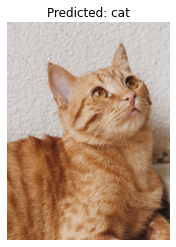

cat (score = 0.88)
chicken (score = 0.11)
cow (score = 0.02)


In [15]:
import sys
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

def predict_image(image_path):
    # Load the saved model
    model = load_model('/content/drive/MyDrive/trained_models/animal_classifier.h5')

    # Open and preprocess the image
    img = Image.open(image_path)
    img_resized = img.resize((150, 150))
    img_array = img_to_array(img_resized)
    img_normalized = img_array / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)

    # Make predictions
    predictions = model.predict(img_expanded)[0]
    labels = ['cat', 'chicken', 'cow']

    # Find the label with the highest score
    max_score_index = np.argmax(predictions)
    predicted_label = labels[max_score_index]
    
    # Display the image and the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")
    plt.show()

    # Print the results
    for i in range(len(labels)):
        print(f"{labels[i]} (score = {predictions[i]:.2f})")

if __name__ == "__main__":
    image_path = '/content/drive/MyDrive/animal_classifier_test_images/cat4.jpg'
    predict_image(image_path)
        